In [10]:
import numpy as np
import matplotlib.pyplot as plt

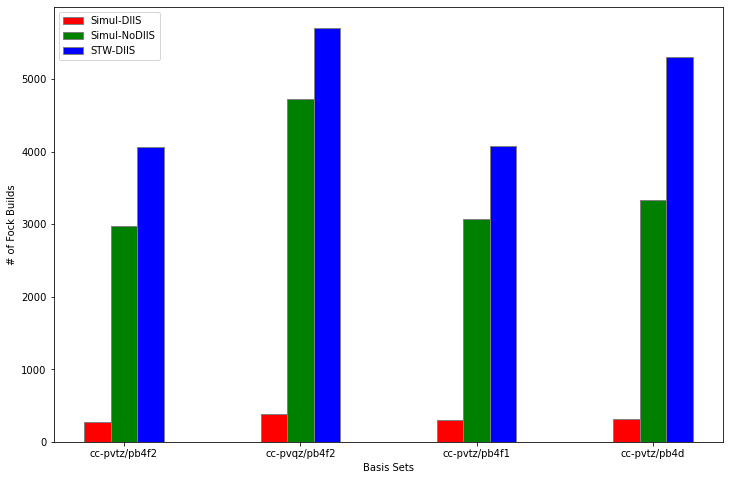

In [11]:
# set width of bar
barWidth = 0.15
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
coh2_simul_diis = np.array([135,189,150,160])
coh2_simul_diis *= 2
coh2_simul_nodiis = np.array([2969,4729,3071,3336])
coh2_stw_diis = np.array([4064,5708,4081,5299])

# Set position of bar on X axis
br1 = np.arange(len(coh2_simul_diis))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, coh2_simul_diis, color ='r', width = barWidth,
        edgecolor ='grey', label ='Simul-DIIS')
plt.bar(br2, coh2_simul_nodiis, color ='g', width = barWidth,
        edgecolor ='grey', label ='Simul-NoDIIS')
plt.bar(br3, coh2_stw_diis, color ='b', width = barWidth,
        edgecolor ='grey', label ='STW-DIIS')

# Adding Xticks
plt.xlabel('Basis Sets')
plt.ylabel('# of Fock Builds')
plt.xticks([r + barWidth for r in range(len(coh2_simul_diis))],
        ['cc-pvtz/pb4f2', 'cc-pvqz/pb4f2', 'cc-pvtz/pb4f1', 'cc-pvtz/pb4d'])

plt.legend()
plt.show()

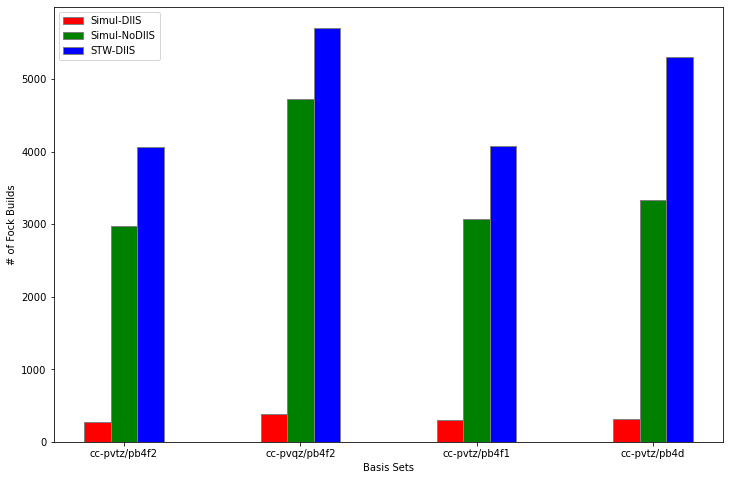

In [12]:
# set width of bar
barWidth = 0.15
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
coh2_simul_diis = np.array([135,189,150,160])
coh2_simul_diis *= 2
coh2_simul_nodiis = np.array([2969,4729,3071,3336])
coh2_stw_diis = np.array([4064,5708,4081,5299])

# Set position of bar on X axis
br1 = np.arange(len(coh2_simul_diis))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, coh2_simul_diis, color ='r', width = barWidth,
        edgecolor ='grey', label ='Simul-DIIS')
plt.bar(br2, coh2_simul_nodiis, color ='g', width = barWidth,
        edgecolor ='grey', label ='Simul-NoDIIS')
plt.bar(br3, coh2_stw_diis, color ='b', width = barWidth,
        edgecolor ='grey', label ='STW-DIIS')

# Adding Xticks
plt.xlabel('Basis Sets')
plt.ylabel('# of Fock Builds')
plt.xticks([r + barWidth for r in range(len(coh2_simul_diis))],
        ['cc-pvtz/pb4f2', 'cc-pvqz/pb4f2', 'cc-pvtz/pb4f1', 'cc-pvtz/pb4d'])

plt.legend()
plt.show()

In [13]:
# set height of bar
coh2_simul_diis = np.array([135,189,150,160])  *2 
coh2_simul_nodiis = np.array([2969,4729,3071,3336]) *2 
coh2_stw_diis = np.array([4064,5708,4081,5299])

# set height of bar
hcn_simul_diis = np.array([118,105,101,101]) *2 
hcn_simul_nodiis = np.array([2387,2827,2419,2676])*2 
hcn_stw_diis = np.array([3065,3327,2983,3829])

# set height of bar
fhf_simul_diis = np.array([54,78,66,70])*2 
fhf_simul_nodiis = np.array([1125,1130,1149,1280])*2 
fhf_stw_diis = np.array([867,901,934,1109])

AttributeError: 'Figure' object has no attribute 'supxlabel'

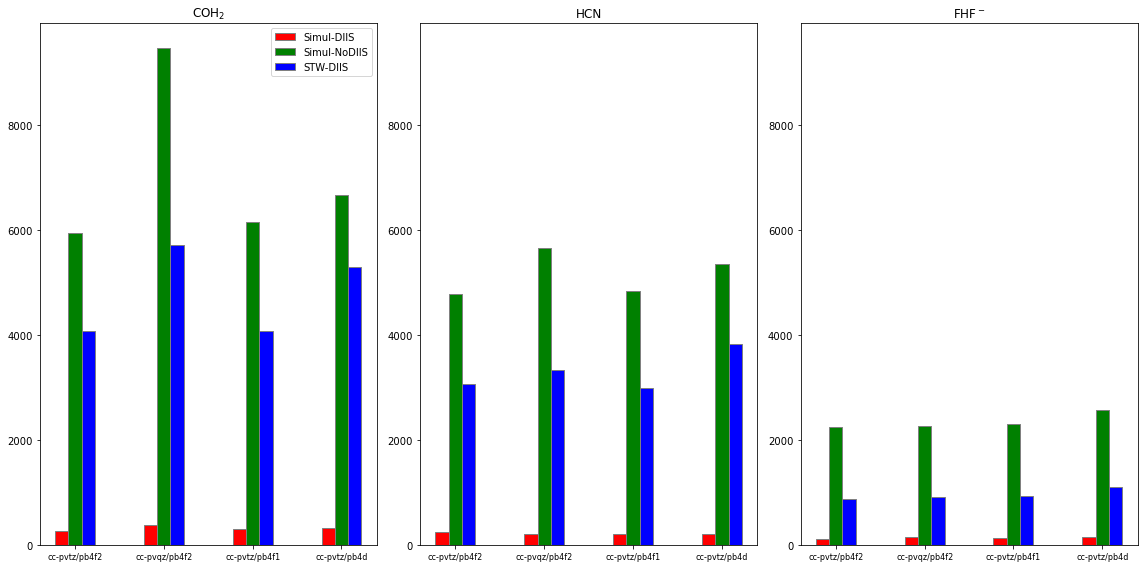

In [16]:
fig = plt.figure(figsize =(16, 8),tight_layout=True)
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.bar(br1, coh2_simul_diis, color ='r', width = barWidth,
        edgecolor ='grey', label ='Simul-DIIS')
ax1.bar(br2, coh2_simul_nodiis, color ='g', width = barWidth,
        edgecolor ='grey', label ='Simul-NoDIIS')
ax1.bar(br3, coh2_stw_diis, color ='b', width = barWidth,
        edgecolor ='grey', label ='STW-DIIS')
ax1.legend()
ax1.set_xticks([r + barWidth for r in range(len(coh2_simul_diis))])
ax1.set_xticklabels(['cc-pvtz/pb4f2', 'cc-pvqz/pb4f2', 'cc-pvtz/pb4f1', 'cc-pvtz/pb4d'],fontsize=8)


ax2.bar(br1, hcn_simul_diis, color ='r', width = barWidth,
        edgecolor ='grey', label ='Simul-DIIS')
ax2.bar(br2, hcn_simul_nodiis, color ='g', width = barWidth,
        edgecolor ='grey', label ='Simul-NoDIIS')
ax2.bar(br3, hcn_stw_diis, color ='b', width = barWidth,
        edgecolor ='grey', label ='STW-DIIS')
ax2.set_xticks([r + barWidth for r in range(len(coh2_simul_diis))])
ax2.set_xticklabels(['cc-pvtz/pb4f2', 'cc-pvqz/pb4f2', 'cc-pvtz/pb4f1', 'cc-pvtz/pb4d'],fontsize=8)


ax3.bar(br1, fhf_simul_diis, color ='r', width = barWidth,
        edgecolor ='grey', label ='Simul-DIIS')
ax3.bar(br2, fhf_simul_nodiis, color ='g', width = barWidth,
        edgecolor ='grey', label ='Simul-NoDIIS')
ax3.bar(br3, fhf_stw_diis, color ='b', width = barWidth,
        edgecolor ='grey', label ='STW-DIIS')
ax3.set_xticks([r + barWidth for r in range(len(coh2_simul_diis))])
ax3.set_xticklabels(['cc-pvtz/pb4f2', 'cc-pvqz/pb4f2', 'cc-pvtz/pb4f1', 'cc-pvtz/pb4d'],fontsize=8)

ax1.title.set_text('COH$_2$')
ax2.title.set_text('HCN')
ax3.title.set_text('FHF$^-$')

ax2.sharey(ax1)
ax3.sharey(ax1)

plt.xticks([r + barWidth for r in range(len(coh2_simul_diis))],
        ['cc-pvtz/pb4f2', 'cc-pvqz/pb4f2', 'cc-pvtz/pb4f1', 'cc-pvtz/pb4d'])

fig.supxlabel('Basis Sets Used for Electrons/Quantum Protons')
fig.supylabel('Number of Fock Formations')
plt.savefig('small_system_AlgvsIter.pdf',dpi=600)
plt.show()
